## **Memprediksi Kelangsungan hidup seorang Pasien Pengidap Penyakit Sirosis**



### **Pendahuluan**

Sirosis adalah kondisi ketika organ hati telah dipenuhi dengan jaringan parut dan tidak bisa berfungsi dengan normal. Jaringan parut ini terbentuk akibat penyakit liver yang berkepanjangan, misalnya karena infeksi virus hepatitis atau kecanduan alkohol

Prediksi Kelangsungan Hidup Pasien Sirosis adalah memprediksi apakah seorang pasien yang menderita penyakit sirosis hati (liver cirrhosis) akan bertahan hidup dalam jangka waktu tertentu atau tidak, berdasarkan data klinis atau medis pasien tersebut.
Prediksi kelangsungan hidup pasien sirosis juga penting untuk membantu dokter menentukan tindakan medis, menetapkan prioritas transplantasi hati, serta memberikan gambaran prognosis bagi pasien dan keluarganya.

### **Data Understanding**

#### **Sumber Data**

data diperoleh ini memanfaatkan 17 fitur klinis untuk memprediksi status kelangsungan hidup pasien dengan sirosis hati. Status kelangsungan hidup meliputi 0 = D (meninggal), 1 = C (disensor), 2 = CL (disensor karena transplantasi hati).

Berikut ini link dataset:https://archive.ics.uci.edu/dataset/878/cirrhosis+patient+survival+prediction+dataset-1

In [2]:
!pip install ucimlrepo

#### **Mengumpulkan data awal**

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
cirrhosis_patient_survival_prediction = fetch_ucirepo(id=878)

# data (as pandas dataframes)
X = cirrhosis_patient_survival_prediction.data.features
y = cirrhosis_patient_survival_prediction.data.targets

# metadata
print(cirrhosis_patient_survival_prediction.metadata)

# variable information
print(cirrhosis_patient_survival_prediction.variables)


{'uci_id': 878, 'name': 'Cirrhosis Patient Survival Prediction', 'repository_url': 'https://archive.ics.uci.edu/dataset/878/cirrhosis+patient+survival+prediction+dataset-1', 'data_url': 'https://archive.ics.uci.edu/static/public/878/data.csv', 'abstract': 'Utilize 17 clinical features for predicting survival state of patients with liver cirrhosis. The survival states include 0 = D (death), 1 = C (censored), 2 = CL (censored due to liver transplantation).', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 418, 'num_features': 17, 'feature_types': ['Real', 'Categorical'], 'demographics': ['Age', 'Sex'], 'target_col': ['Status'], 'index_col': ['ID'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5R02G', 'creators': ['E. Dickson', 'P. Grambsch', 'T. Fleming', 'L. Fisher', 'A. Langworthy'], 'intro_paper': {'ID': 296, 'type'

#### **Mendeskripsikan data**

1. **Format Data**

  Dataset ini diunduh dari repositori UCI Machine Learning Repository menggunakan library ucimlrepo. Format data yang didapat adalah dataframe dari pustaka pandas, yang terdiri dari dua bagian utama:
  - Features (X): berisi atribut atau variabel input yang digunakan untuk prediksi.
  - Targets (y): berisi label atau kelas target (kelangsungan hidup pasien).

2. **Jumlah Data**

  pada kumpulan data yang saya ambil terdapat berupa record (baris data) Jumlah: 418 pasien sedangkan jumlah atribut (kolom data): 20 fitur + 1 target = 21 kolom total

3. **Identitas Atribut (Field-field)**

  Beberapa atribut penting dalam dataset ini meliputi:
  - Age: Usia pasien (dalam tahun)

  - Sex: Jenis kelamin pasien (M/F)

  - Bilirubin, Albumin, Prothrombin: Hasil laboratorium fungsi hati

  - Ascites, Hepatomegaly, Spiders, Edema: Gejala klinis atau kondisi fisik

  - Drug: Jenis pengobatan yang diterima

  - Status: Target klasifikasi, status akhir pasien (D = Deceased, C = Censored/Hidup)

  Atribut-atribut ini memiliki berbagai tipe data: numerik kontinu, kategori biner, dan kategori nominal.

4. **Karakteristik Data yang Terlihat**

  Terdapat kombinasi data numerik dan kategorikal, sehingga perlu pra-pemrosesan (normalisasi, encoding).Beberapa nilai missing ditemukan dalam fitur tertentu seperti Prothrombin dan Tryglicerides, sehingga perlu penanganan imputasi.Data cukup seimbang meskipun ada kecenderungan dominasi kelas tertentu (biasanya lebih banyak pasien meninggal).Terdapat fitur-fitur medis yang sangat relevan secara klinis untuk prediksi kelangsungan hidup.

5. **Kecocokan Data terhadap Kebutuhan Proyek**

  Dataset ini sangat sesuai untuk proyek klasifikasi prediksi kelangsungan hidup pasien sirosis karena:

  - Memiliki atribut klinis yang kuat dan terukur.

  - Target kelas jelas dan dapat digunakan untuk supervised learning.

  - Jumlah data cukup representatif untuk model klasifikasi dasar hingga menengah.

#### **Ekplorasi Data**

Pada tahap eksplorasi data ini, bertujuan untuk memahami karakteristik data secara lebih mendalam melalui analisis statistik dan visualisasi, serta menemukan hipotesis awal yang berpotensi memengaruhi kelangsungan hidup pasien. Aktivitas ini mencakup analisis distribusi fitur, pencarian korelasi antar variabel, dan observasi pola visual yang muncul.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

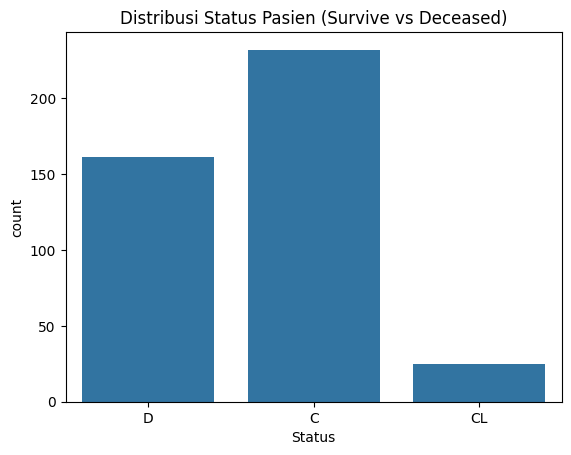

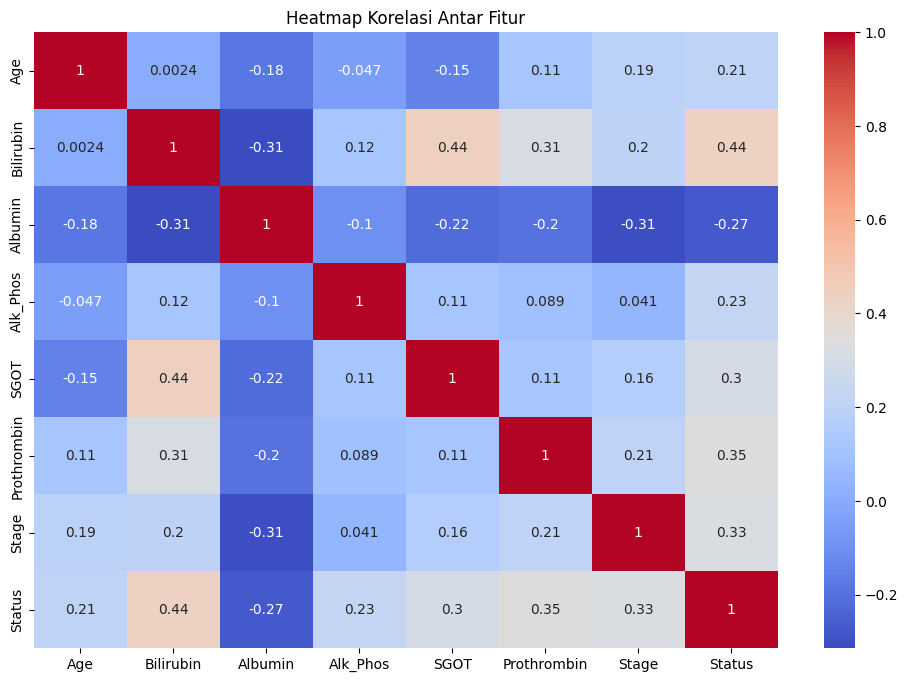

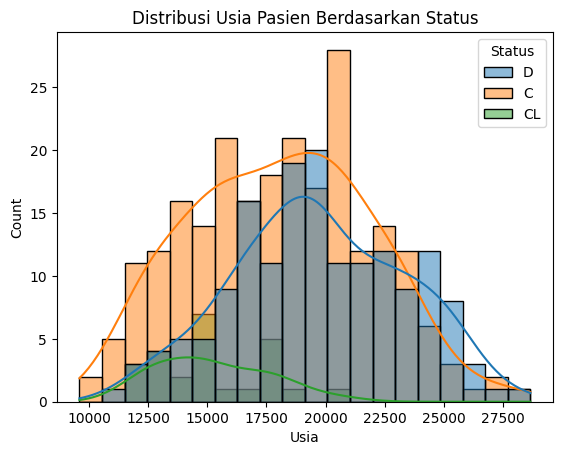

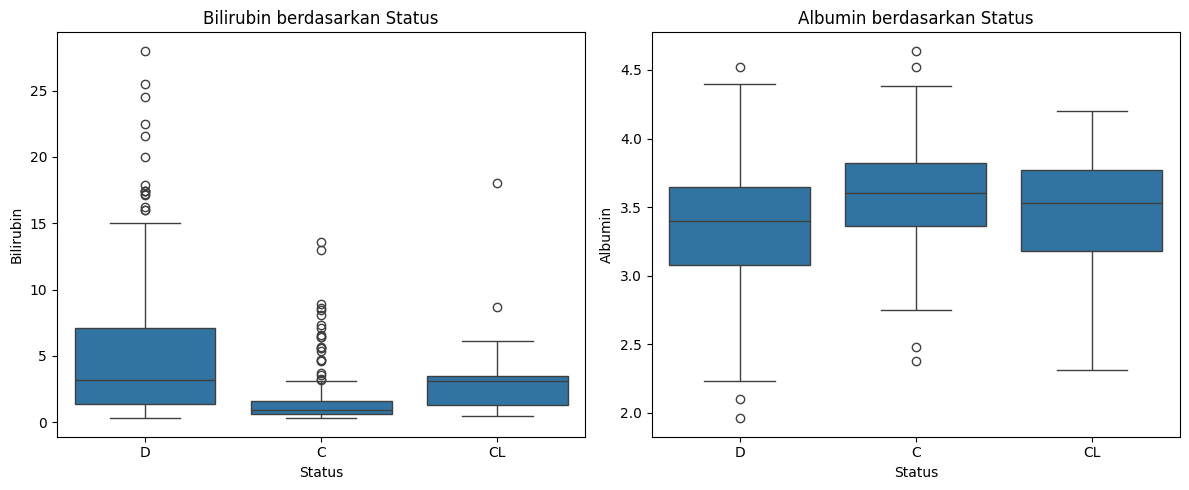

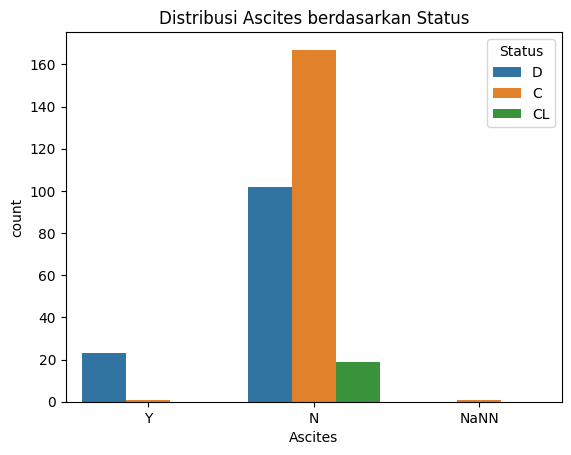

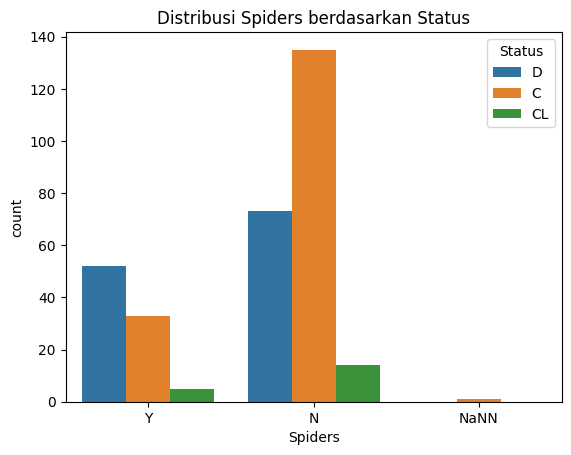

In [5]:
# Gabungkan untuk kemudahan eksplorasi
df = X.copy()
df["Status"] = y["Status"]  # 'D' = Deceased, 'C' = Censored

# Visualisasi distribusi target
sns.countplot(x="Status", data=df)
plt.title("Distribusi Status Pasien (Survive vs Deceased)")
plt.show()

# Korelasi antar fitur numerik
df_corr = df.copy()
df_corr["Status"] = df_corr["Status"].map({"C": 0, "D": 1})  # Encode target
corr_matrix = df_corr.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()

# Distribusi usia berdasarkan status
sns.histplot(data=df, x="Age", hue="Status", bins=20, kde=True)
plt.title("Distribusi Usia Pasien Berdasarkan Status")
plt.xlabel("Usia")
plt.show()

# Boxplot Bilirubin dan Albumin berdasarkan status
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x="Status", y="Bilirubin", data=df)
plt.title("Bilirubin berdasarkan Status")

plt.subplot(1, 2, 2)
sns.boxplot(x="Status", y="Albumin", data=df)
plt.title("Albumin berdasarkan Status")

plt.tight_layout()
plt.show()

# Distribusi fitur kategorikal: Ascites dan Spiders
categorical_features = ["Ascites", "Spiders"]

for feature in categorical_features:
    sns.countplot(x=feature, hue="Status", data=df)
    plt.title(f"Distribusi {feature} berdasarkan Status")
    plt.show()

### **Preprocessing Data**

pada proses ini data yang tadinya dikumpulkan, didefinisikan dll dalam proses data understanding langkah selanjutnya yaitu preprocessing data yang mana data ini kita mendeteksi data yang terindikasi outlier (jika ditemukan), Misiing value dll. harapannya setelah proses ini kita tau data yang kotor itu mana dan ada berapa serta data yang missing value itu mana dan ada berapa.

Berikut ini kita implmentasikan prosesnya dalam bentuk code program:

In [6]:
# Ambil dataset
cirrhosis_data = fetch_ucirepo(id=878)
X = cirrhosis_data.data.features
y = cirrhosis_data.data.targets
df = pd.concat([X, y], axis=1)

# Cek data yang memiliki missing value
df_missing = df[df.isnull().any(axis=1)]
print("=== Data yang Memiliki Missing Value ===")
print(df_missing)

print("\n=== Jumlah Missing Value per Kolom ===")
print(df.isnull().sum())

# Bersihkan data dari missing value
df_cleaned = df.dropna().reset_index(drop=True)

# Tentukan kolom numerik
numeric_columns = df_cleaned.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Fungsi hapus outlier dan tampilkan
def remove_outliers_iqr_show(dataframe, numeric_cols):
    cleaned_df = dataframe.copy()
    outlier_data = pd.DataFrame()
    for col in numeric_cols:
        Q1 = cleaned_df[col].quantile(0.25)
        Q3 = cleaned_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outliers = cleaned_df[(cleaned_df[col] < lower) | (cleaned_df[col] > upper)]
        print(f"{col}: Ditemukan {len(outliers)} outlier")
        outlier_data = pd.concat([outlier_data, outliers])
        cleaned_df = cleaned_df[(cleaned_df[col] >= lower) & (cleaned_df[col] <= upper)]
    return cleaned_df.reset_index(drop=True), outlier_data.drop_duplicates()

# Deteksi dan simpan outlier
df_no_outlier, outlier_rows = remove_outliers_iqr_show(df_cleaned, numeric_columns)

# Tampilkan outlier
print("\n=== Data yang Terdeteksi sebagai Outlier ===")
print(outlier_rows)

# Jumlah total baris unik yang merupakan outlier
print(f"\nJumlah total outlier unik: {len(outlier_rows)}")

=== Data yang Memiliki Missing Value ===
     Drug    Age Sex Ascites Hepatomegaly Spiders Edema  Bilirubin  \
312  NaNN  21915   F    NaNN         NaNN    NaNN     N        0.7   
313   NaN  23741   F     NaN          NaN     NaN     S        1.4   
314   NaN  19724   F     NaN          NaN     NaN     N        0.7   
315   NaN  27394   F     NaN          NaN     NaN     S        0.7   
316   NaN  22646   F     NaN          NaN     NaN     N        0.8   
..    ...    ...  ..     ...          ...     ...   ...        ...   
413   NaN  24472   F     NaN          NaN     NaN     N        1.2   
414   NaN  14245   F     NaN          NaN     NaN     N        0.9   
415   NaN  20819   F     NaN          NaN     NaN     N        1.6   
416   NaN  21185   F     NaN          NaN     NaN     N        0.8   
417   NaN  19358   F     NaN          NaN     NaN     N        0.7   

    Cholesterol  Albumin Copper  Alk_Phos  SGOT Tryglicerides Platelets  \
312         NaN     3.65    NaN       NaN  

Setelah Data-data dideteksi ternyata ada data yang outlier dan missing value, kita fokus kan dulu untuk mengatasi missing value nya terlebih dahulu.cara nya ada banyak untuk imputasi missing value salah satunya dengan imputasi menggunakan KNN atau model.

#### **Imputasi Menggunakan KNN atau Model**

KNN Imputer adalah metode imputasi yang mengisi nilai hilang berdasarkan rata-rata dari data yang paling mirip (tetangga terdekat). Dalam data prediksi kelangsungan hidup pasien sirosis, metode ini digunakan karena mempertahankan sebanyak mungkin data tanpa menghapus baris yang memiliki missing value. Dengan mempertimbangkan kemiripan antar pasien berdasarkan fitur medis lain, nilai yang diisi menjadi lebih akurat dan relevan. Hal ini penting agar model klasifikasi yang dibangun memiliki kualitas data yang baik dan tidak kehilangan informasi penting dari pasien. berikut implementasi dalam bentuk code program:

In [7]:
# 1. Ambil dataset
cirrhosis_data = fetch_ucirepo(id=878)
X = cirrhosis_data.data.features
y = cirrhosis_data.data.targets

# 2. Gabungkan fitur dan target
df = pd.concat([X, y], axis=1)

# 3. Encode kolom kategorikal sebelum imputasi
df_encoded = df.copy()
categorical_cols = df_encoded.select_dtypes(include='object').columns

# Simpan mapping encoder agar nanti bisa dikembalikan ke label aslinya
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    label_encoders[col] = le

# 4. Terapkan KNN Imputer
imputer = KNNImputer(n_neighbors=5)
df_imputed_array = imputer.fit_transform(df_encoded)
df_imputed = pd.DataFrame(df_imputed_array, columns=df.columns)

# 5. Kembalikan nilai kategorikal ke bentuk label (opsional)
for col in categorical_cols:
    le = label_encoders[col]
    df_imputed[col] = np.round(df_imputed[col]).astype(int)
    df_imputed[col] = le.inverse_transform(df_imputed[col])

# 6. Cek apakah masih ada missing value
print("\n=== Cek Missing Value Setelah Imputasi ===")
print(df_imputed.isnull().sum())

# 7. Tampilkan 5 data pertama
print("\n=== Contoh Data Setelah Imputasi ===")
print(df_imputed.head())

print("\nTotal missing value setelah imputasi:", df_imputed.isnull().sum().sum())



=== Cek Missing Value Setelah Imputasi ===
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Status           0
dtype: int64

=== Contoh Data Setelah Imputasi ===
              Drug      Age Sex Ascites Hepatomegaly Spiders Edema  Bilirubin  \
0  D-penicillamine  21464.0   F       Y            Y       Y     Y       14.5   
1  D-penicillamine  20617.0   F       N            Y       Y     N        1.1   
2  D-penicillamine  25594.0   M       N            N       N     S        1.4   
3  D-penicillamine  19994.0   F       N            Y       Y     S        1.8   
4          Placebo  13918.0   F       N            Y       Y     N        3.4   

  Cholesterol  Albumin Copper  Alk_Phos    SGOT Tryglicerides Platelets  \
0

In [14]:
# Setelah imputasi dan pengembalian label
total_missing = df_imputed.isnull().sum().sum()
if total_missing > 0:
    df_imputed.dropna(inplace=True)

# Simpan ke file
df_imputed.to_csv('sirosis.csv', index=False)

setelah data bersih dari NAN disimpan di file sirosis.csv

Setelah dilakukan proses imputasi missing outlier diatas tadi dirasa masih kurang maksimal dan kualitas data masih belum bagus maka kita lakukan *normalisasi*.pada tahap ini banyak metode yang dilakukan salah satunya *Min-Max Scaling*.

#### **Normalisasi**

Normalisasi pada proses data ini dilakukan untuk menyetarakan skala nilai dari setiap fitur numerik agar berada dalam rentang 0 hingga 1 menggunakan metode Min-Max Scaling. Langkah ini penting karena data medis seperti pada dataset prediksi kelangsungan hidup pasien sirosis memiliki variabel dengan skala yang sangat berbeda, seperti umur, kadar bilirubin, dan albumin. Dengan menyamakan skala, algoritma pembelajaran mesin seperti K-Nearest Neighbors dapat memberikan bobot yang seimbang terhadap semua fitur, sehingga meningkatkan akurasi dan stabilitas model. Normalisasi dilakukan setelah proses imputasi missing value agar tidak terjadi distorsi pada nilai yang telah diisi sebelumnya. Berikut kita implementasikan dalam bentuk code program.

In [9]:
df_normalized = df_imputed.copy()
numeric_cols = df_normalized.select_dtypes(include=["int64", "float64"]).columns.tolist()
scaler = MinMaxScaler()
df_normalized[numeric_cols] = scaler.fit_transform(df_normalized[numeric_cols])

# 7. Tampilkan hasil normalisasi
print("\n=== Ringkasan Setelah Imputasi dan Normalisasi ===")
print(df_normalized.head())

# Cek bahwa semua numerik berada di antara 0 dan 1
print("\n=== Range Kolom Numerik Setelah Normalisasi ===")
print(df_normalized[numeric_cols].describe())


=== Ringkasan Setelah Imputasi dan Normalisasi ===
              Drug       Age Sex Ascites Hepatomegaly Spiders Edema  \
0  D-penicillamine  0.622822   F       Y            Y       Y     Y   
1  D-penicillamine  0.578364   F       N            Y       Y     N   
2  D-penicillamine  0.839597   M       N            N       N     S   
3  D-penicillamine  0.545664   F       N            Y       Y     S   
4          Placebo  0.226748   F       N            Y       Y     N   

   Bilirubin Cholesterol   Albumin Copper  Alk_Phos      SGOT Tryglicerides  \
0   0.512635         261  0.238806    156  0.105279  0.258993           172   
1   0.028881         302  0.813433     54  0.523509  0.202298            88   
2   0.039711         176  0.567164    210  0.016724  0.161871            55   
3   0.054152         244  0.216418     64  0.429723  0.079554            92   
4   0.111913         279  0.585821    143  0.028143  0.201439            72   

  Platelets  Prothrombin     Stage Status  
0 

selanjutnya permasalahan dalam data ini ada 2 yaitu Missing value dan data outlier dan kita tadi sudah menyelesaikan untuk permasalahan missing value sekarang kita lanjut mengatasi permasalahan data outlier. caranya kita filter data yang terdeteksi oulier menggunakan metode *LOF (Local Outlier Factor)*.

#### **Mengatasi data Outlier menggunakan LOF**

Local Outlier Factor (LOF) adalah metode deteksi outlier berbasis kepadatan lokal yang digunakan untuk mengidentifikasi data yang memiliki kepadatan jauh lebih rendah dibandingkan dengan tetangga terdekatnya. Dalam tahap ini, LOF digunakan untuk mendeteksi dan mengatasi outlier pada data prediksi kelangsungan hidup pasien sirosis setelah data mengalami imputasi dan normalisasi. Penggunaan LOF sangat relevan karena data medis sering memiliki nilai ekstrim yang tidak wajar akibat kesalahan pencatatan atau kondisi pasien yang sangat langka. LOF membandingkan jarak dan kepadatan lokal suatu titik terhadap tetangganya (dengan parameter n_neighbors), lalu memberikan skor yang menunjukkan apakah titik tersebut merupakan outlier. Dengan menghapus data yang diberi label outlier oleh LOF, kualitas data meningkat dan model pembelajaran mesin berikutnya dapat bekerja lebih akurat dan stabil tanpa dipengaruhi data ekstrem yang menyimpang.

In [10]:
# Deteksi Outlier dengan LOF
print("\n=== Tahap 4: Deteksi Outlier dengan LOF ===")
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)  # 5% asumsi outlier
X_numeric = df_normalized[numeric_cols]
y_pred_lof = lof.fit_predict(X_numeric)

# -1 berarti outlier, 1 berarti inlier
df_normalized["LOF_outlier"] = y_pred_lof
outlier_count = (df_normalized["LOF_outlier"] == -1).sum()
print(f"Jumlah data yang terdeteksi sebagai outlier oleh LOF: {outlier_count}")

# Hapus Outlier
print("\n=== Tahap 5: Hapus Outlier ===")
df_no_outlier_lof = df_normalized[df_normalized["LOF_outlier"] == 1].drop(columns="LOF_outlier").reset_index(drop=True)
print("Jumlah data setelah menghapus outlier:", len(df_no_outlier_lof))

# Contoh data akhir
print("\n=== Contoh 5 Data Setelah Menghapus Outlier ===")
print(df_no_outlier_lof.head())

lof_check = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
check_pred = lof_check.fit_predict(df_no_outlier_lof[numeric_cols])

# Hitung outlier yang masih muncul
remaining_outliers = (check_pred == -1).sum()
print(f"\nSisa outlier yang terdeteksi setelah pembersihan: {remaining_outliers}")


=== Tahap 4: Deteksi Outlier dengan LOF ===
Jumlah data yang terdeteksi sebagai outlier oleh LOF: 21

=== Tahap 5: Hapus Outlier ===
Jumlah data setelah menghapus outlier: 397

=== Contoh 5 Data Setelah Menghapus Outlier ===
              Drug       Age Sex Ascites Hepatomegaly Spiders Edema  \
0  D-penicillamine  0.622822   F       Y            Y       Y     Y   
1  D-penicillamine  0.839597   M       N            N       N     S   
2          Placebo  0.226748   F       N            Y       Y     N   
3          Placebo  0.766481   F       N            Y       N     N   
4          Placebo  0.560886   F       N            Y       N     N   

   Bilirubin Cholesterol   Albumin Copper  Alk_Phos      SGOT Tryglicerides  \
0   0.512635         261  0.238806    156  0.105279  0.258993           172   
1   0.039711         176  0.567164    210  0.016724  0.161871            55   
2   0.111913         279  0.585821    143  0.028143  0.201439            72   
3   0.018051         248  0.753

setelah tahapan-tahapan Preprocessing data tadi telah dilakukan, Proses selanjutnya yaitu Modelling data,

### **Modelling data**

Dalam proses Modelling data yang perlu diperhatikan itu mengenai data. data harus sudah bersih dari kotoran (outlier,missing value dll). ada beberapa jenis model yang dapat digunakan namun harus menyesuaikam dengan data yang dipakai dan bergantung juga pada masalahnya apa. diantaranya sebagai berikut:
- Klasifikasi: Logistic Regression, Decision Tree, Random Forest, SVM, Naive Bayes, KNN, dll.

- Regresi: Linear Regression, Ridge/Lasso, SVR, Random Forest Regressor

- Clustering: K-Means, DBSCAN, Hierarchical

- Anomali: LOF, Isolation Forest

Pada data ini kita akan menggunakan Klasifikasi dengan Naive Bayes.

#### **klasifikasi Menggunakan Metode Naive bayes**

Naïve Bayes adalah salah satu algoritma yang umum digunakan dalam penambangan data (data mining) dan machine learning, terutama untuk klasifikasi. pada data ini kita gunakan metode ini karena dianggap sangat efisien dan bagus.Implementasi Tahapan-tahapannya sebagai berikut:

**Tahap 1:Pisahkan Fitur (X) dan Target (y)**

Kita ambil semua kolom sebagai fitur kecuali kolom Status yang menjadi target klasifikasi.
Status berisi dua kelas: "C" (hidup) dan "D" (meninggal). Kita perlu mengubahnya ke format numerik agar bisa diproses oleh model.


**Tahap 2: Encode Target Variabel**

Karena Naive Bayes memerlukan nilai numerik, kita ubah nilai target Status:

"C" → 0 (Hidup)

"CL" → 01 (Tengah-tengah)

"D" → 1 (Meninggal)

**Tahap 3: Split Data Latih dan Uji**

Untuk mengevaluasi performa model, data dibagi menjadi dua bagian:

- 80% data latih (training set)

- 20% data uji (test set)

Ini akan memastikan model dilatih dan diuji secara adil.

**Tahap 4: Latih Model Naive Bayes**

Kita gunakan algoritma Gaussian Naive Bayes, cocok untuk data numerik yang sudah dinormalisasi.
Naive Bayes mengasumsikan bahwa setiap fitur bersifat independen dan mengikuti distribusi Gaussian (normal), yang masih cukup baik untuk banyak kasus klasifikasi.

**Tahap 5: Lakukan Prediksi pada Data Uji**

Model akan digunakan untuk memprediksi apakah pasien akan hidup atau meninggal berdasarkan data uji.

**Tahap 6: Evaluasi Model**

Kita evaluasi hasil prediksi dengan:

- Confusion Matrix

- Classification Report: precision, recall, f1-score, dan akurasi

In [11]:
# === STEP 1: Ambil dan gabungkan data ===
data = fetch_ucirepo(id=878)
X, y = data.data.features, data.data.targets
df = pd.concat([X, y], axis=1)

# === STEP 2: Encode kolom kategorikal ===
df_encoded = df.copy()
categorical_cols = df_encoded.select_dtypes(include='object').columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    label_encoders[col] = le

# === STEP 3: Imputasi missing value dengan KNN ===
imputer = KNNImputer(n_neighbors=5)
df_imputed_array = imputer.fit_transform(df_encoded)
df_imputed = pd.DataFrame(df_imputed_array, columns=df_encoded.columns)

# === STEP 4: Normalisasi semua kolom numerik ===
numeric_cols = df_imputed.select_dtypes(include=['float64', 'int64']).columns
scaler = MinMaxScaler()
df_normalized = df_imputed.copy()
df_normalized[numeric_cols] = scaler.fit_transform(df_imputed[numeric_cols])

# === STEP 5: Deteksi dan hapus outlier dengan LOF ===
print("\n=== Deteksi Outlier dengan LOF ===")
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
X_numeric = df_normalized[numeric_cols]
y_pred_lof = lof.fit_predict(X_numeric)
df_normalized["LOF_outlier"] = y_pred_lof
outlier_count = (df_normalized["LOF_outlier"] == -1).sum()
print(f"Jumlah data outlier (LOF): {outlier_count}")

# Hapus outlier
df_no_outlier_lof = df_normalized[df_normalized["LOF_outlier"] == 1].drop(columns="LOF_outlier").reset_index(drop=True)
print("Jumlah data setelah hapus outlier:", len(df_no_outlier_lof))

# === STEP 6: Modelling Naive Bayes ===
print("\n=== Modelling dengan Naive Bayes ===")
# Pisahkan fitur dan target
X_final = df_no_outlier_lof.drop(columns=["Status"])
y_final = df_no_outlier_lof["Status"]

# Encode target (Status)
le_status = LabelEncoder()
y_encoded = le_status.fit_transform(y_final)

# Split train-test
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Train model
model = GaussianNB()
model.fit(X_train, y_train)

# Evaluasi
y_pred = model.predict(X_test)
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))



=== Deteksi Outlier dengan LOF ===
Jumlah data outlier (LOF): 21
Jumlah data setelah hapus outlier: 397

=== Modelling dengan Naive Bayes ===
Akurasi: 0.775

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.95      0.84        43
           1       0.00      0.00      0.00         5
           2       0.88      0.66      0.75        32

    accuracy                           0.78        80
   macro avg       0.54      0.54      0.53        80
weighted avg       0.75      0.78      0.75        80


Confusion Matrix:
 [[41  1  1]
 [ 3  0  2]
 [11  0 21]]


##### **Perbandingan dengan metode KNN dan decision Tree**


=== Evaluasi Decision Tree ===
Akurasi: 0.7125
              precision    recall  f1-score   support

           0       0.74      0.81      0.78        43
           1       0.20      0.20      0.20         5
           2       0.75      0.66      0.70        32

    accuracy                           0.71        80
   macro avg       0.56      0.56      0.56        80
weighted avg       0.71      0.71      0.71        80

Distribusi Prediksi: [47  5 28]


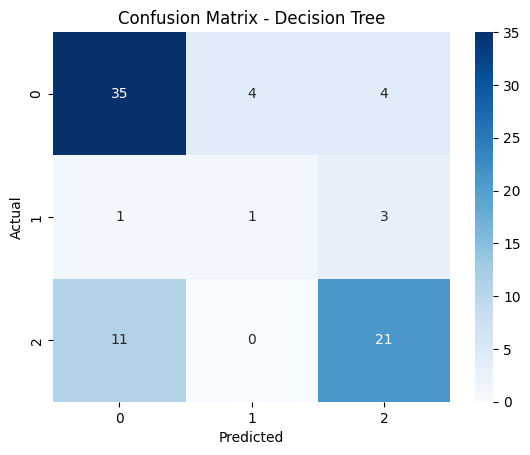


=== Evaluasi KNN (k=5) ===
Akurasi: 0.7125
              precision    recall  f1-score   support

           0       0.68      0.93      0.78        43
           1       0.00      0.00      0.00         5
           2       0.81      0.53      0.64        32

    accuracy                           0.71        80
   macro avg       0.50      0.49      0.48        80
weighted avg       0.69      0.71      0.68        80

Distribusi Prediksi: [59  0 21]


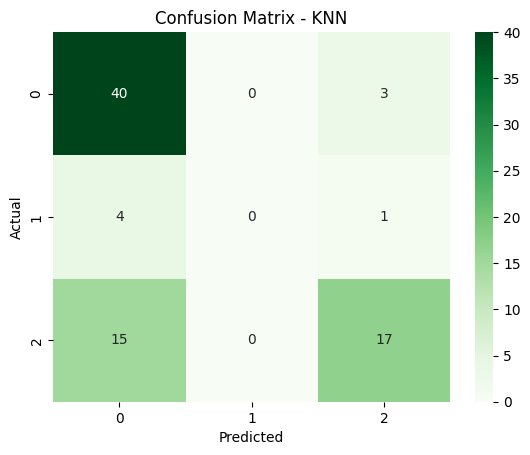

In [12]:
# === MODEL: Decision Tree ===
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)

print("\n=== Evaluasi Decision Tree ===")
print("Akurasi:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt, zero_division=0))
print("Distribusi Prediksi:", np.bincount(y_pred_dt))
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# === MODEL: K-Nearest Neighbors (KNN) ===
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)

print("\n=== Evaluasi KNN (k=5) ===")
print("Akurasi:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn, zero_division=0))
print("Distribusi Prediksi:", np.bincount(y_pred_knn))
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, cmap='Greens', fmt='d')
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### **Evaluasi**

setelah kita melakukan modelling data menggunakan naive bayes, KNN dan DecisionTree proses selanjutnya yaitu evaluasi keseluruhan hasil perbandingan yang telah dilakukan.

✅ **Hasil perbandingan**

| **Model**     | **Akurasi** | **Precision (Macro)** | **Recall (Macro)** | **F1-Score (Macro)** |
| ------------- | ----------- | --------------------- | ------------------ | -------------------- |
| Naive Bayes   | 0.775       | 0.54                  | 0.54               | 0.53                 |
| Decision Tree | 0.7125      | 0.56                  | 0.56               | 0.56                 |
| KNN (k = 5)   | 0.7125      | 0.50                  | 0.49               | 0.48                 |
